In [1]:
# importing neccesary libraries  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# setting default settings for graphs and charts as we are gonna use them so many times

sns.set_style(style='whitegrid')
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
# Load the dataset

data=pd.read_csv('C:\Retail Reimagined\Given Datasets\QVI_data.csv')

data.head()

<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
C:\Users\welcome\AppData\Local\Temp\ipykernel_6252\2629016493.py:3: SyntaxWarning: invalid escape sequence '\R'
  data=pd.read_csv('C:\Retail Reimagined\Given Datasets\QVI_data.csv')


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [5]:
# everything is pretty much good here Just that date column needs to be fixed

data['DATE']=pd.to_datetime(data['DATE'])

In [10]:
# now we will extract the pre-trail period (3 months before trial period which is Feb)
# so we need the period from to Nov 1 2018 to Jan 31 2019

pre_trial_period = (data['DATE'] >= '2018-11-01') & (data['DATE'] < '2019-02-01')

In [ ]:
pre_trial_data = data[pre_trial_period]

In [15]:
pre_trial_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream,2018-12
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget,2018-12
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget,2018-12
8,1009,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium,2018-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264819,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget,2018-11
264826,2370581,2018-12-17,88,240317,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150,DORITOS,OLDER SINGLES/COUPLES,Budget,2018-12
264827,2370581,2018-12-26,88,240318,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Budget,2018-12
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12


In [14]:
# now we will see the total sales per store per month
# and for that we firt need a month column

pre_trial_data['MONTH'] = pre_trial_data['DATE'].dt.to_period('M')

C:\Users\welcome\AppData\Local\Temp\ipykernel_6252\4046741495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_trial_data['MONTH'] = pre_trial_data['DATE'].dt.to_period('M')


In [16]:
# now monthly sales per store per month

monthly_sales = pre_trial_data.groupby(['STORE_NBR', 'MONTH'])['TOT_SALES'].sum().reset_index()

In [17]:
monthly_sales

,STORE_NBR,MONTH,TOT_SALES
0,1,2018-11,192.6
1,1,2018-12,189.6
2,1,2019-01,154.8
3,2,2018-11,162.9
4,2,2018-12,136.0
...,...,...,...
785,271,2018-12,807.4
786,271,2019-01,842.4
787,272,2018-11,376.2
788,272,2018-12,403.9


In [18]:
# now we will convert this dataframe into a pivot table for easier comparison

pivot_sales = monthly_sales.pivot(index='MONTH', columns='STORE_NBR', values='TOT_SALES')

In [19]:
pivot_sales

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
MONTH,,,,,,,,,,,,,,,,,,,,,
2018-11,192.6,162.9,1008.0,1212.0,771.4,255.3,1076.5,349.2,374.4,885.0,...,15.8,184.5,282.8,144.2,40.3,225.4,967.2,965.0,886.4,376.2
2018-12,189.6,136.0,1121.6,1185.6,879.2,209.1,906.1,356.4,382.6,936.6,...,24.6,288.5,205.3,157.8,15.4,207.3,935.4,1038.0,807.4,403.9
2019-01,154.8,162.8,1051.7,1525.0,838.0,191.1,975.1,445.0,399.4,878.6,...,21.3,247.3,176.7,148.7,34.4,157.7,980.4,1066.6,842.4,423.0


In [22]:
# now finally we will corelate the trial stores with every other store and take out 
# the best match for each

trial_stores = [77, 86, 88]

correlations = {}

for trial in trial_stores:
    trial_corr = pivot_sales.corrwith(pivot_sales[trial]).drop(trial)
    best_match = trial_corr.idxmax()
    correlations[trial] = best_match
    print(f"Best control store for trial store {trial} is {best_match} with correlation {trial_corr[best_match]:.2f}")

Best control store for trial store 77 is 117 with correlation 1.00
Best control store for trial store 86 is 218 with correlation 1.00
Best control store for trial store 88 is 218 with correlation 1.00


c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide

In [23]:
correlations

{77: np.int64(117), 86: np.int64(218), 88: np.int64(218)}

In [24]:
pivot_sales[77].equals(pivot_sales[117])
pivot_sales[86].equals(pivot_sales[218])


False

In [25]:
# Check if trial store sales exactly match control store sales
pivot_sales[77].equals(pivot_sales[117])  # Should return True or False
pivot_sales[86].equals(pivot_sales[218])
pivot_sales[88].equals(pivot_sales[218])


False

In [26]:
# Compare trial vs control sales over 3 months
comparison_77 = pivot_sales[[77, 117]]
comparison_86 = pivot_sales[[86, 218]]
comparison_88 = pivot_sales[[88, 218]]

print(comparison_77)
print(comparison_86)
print(comparison_88)


STORE_NBR    77    117
MONTH                 
2018-11    245.3  26.8
2018-12    267.3  27.9
2019-01    204.4   NaN
STORE_NBR    86    218
MONTH                 
2018-11    918.0  47.6
2018-12    841.2   NaN
2019-01    841.4  38.2
STORE_NBR     88    218
MONTH                  
2018-11    1382.8  47.6
2018-12    1325.2   NaN
2019-01    1266.4  38.2


In [31]:
# Remove stores with missing sales data in any of the 3 months
valid_stores = pivot_sales.dropna(axis=1)

# Now run correlation only on valid stores
correlations = {}

for trial in trial_stores:
    trial_corr = valid_stores.corrwith(valid_stores[trial]).drop(trial)
    best_match = trial_corr.idxmax()
    correlations[trial] = best_match
    print(f"Best control store for trial store {trial} is {best_match} with correlation {trial_corr[best_match]:.2f}")


Best control store for trial store 77 is 136 with correlation 1.00
Best control store for trial store 86 is 124 with correlation 1.00
Best control store for trial store 88 is 251 with correlation 1.00


In [39]:
comparison_77 = pivot_sales[[77, 136]]
comparison_86 = pivot_sales[[86, 124]]
comparison_88 = pivot_sales[[88, 251]]

print(comparison_77)
print(comparison_86)
print(comparison_88)


STORE_NBR    77     136
MONTH                  
2018-11    245.3  150.1
2018-12    267.3  160.3
2019-01    204.4  130.5
STORE_NBR    86     124
MONTH                  
2018-11    918.0  230.4
2018-12    841.2  167.9
2019-01    841.4  161.4
STORE_NBR     88     251
MONTH                   
2018-11    1382.8  542.8
2018-12    1325.2  454.0
2019-01    1266.4  368.0


In [38]:
# Calculate average monthly sales for all stores
avg_sales = pivot_sales.mean()

# Allow only stores with similar scale (within ±30%) as the trial store
correlations = {}

for trial in trial_stores:
    trial_series = pivot_sales[trial]
    trial_avg = trial_series.mean()
    
    # Filter stores with similar magnitude
    similar_scale = avg_sales[(avg_sales >= 0.7 * trial_avg) & (avg_sales <= 1.3 * trial_avg)].index
    
    # Drop NaNs and restrict to similar-scale stores only
    valid_corr_df = pivot_sales[similar_scale].dropna()
    
    trial_corr = valid_corr_df.corrwith(trial_series).drop(trial, errors='ignore')
    
    if not trial_corr.empty:
        best_match = trial_corr.idxmax()
        correlations[trial] = best_match
        print(f"Best control store for trial store {trial} is {best_match} with correlation {trial_corr[best_match]:.2f}")
    else:
        print(f"No valid control store found for trial store {trial}")


Best control store for trial store 77 is 195 with correlation 1.00
Best control store for trial store 86 is 259 with correlation 0.99
Best control store for trial store 88 is 36 with correlation 1.00


In [37]:
comparison_77 = pivot_sales[[77, 195 ]]
comparison_86 = pivot_sales[[86, 259 ]]
comparison_88 = pivot_sales[[88, 36 ]]

print(comparison_77)
print(comparison_86)
print(comparison_88)

STORE_NBR    77     195
MONTH                  
2018-11    245.3  222.2
2018-12    267.3  258.0
2019-01    204.4  153.3
STORE_NBR    86      259
MONTH                   
2018-11    918.0  1064.4
2018-12    841.2   978.6
2019-01    841.4   992.2
STORE_NBR      88      36
MONTH                    
2018-11    1382.8  1098.4
2018-12    1325.2  1014.8
2019-01    1266.4   923.4


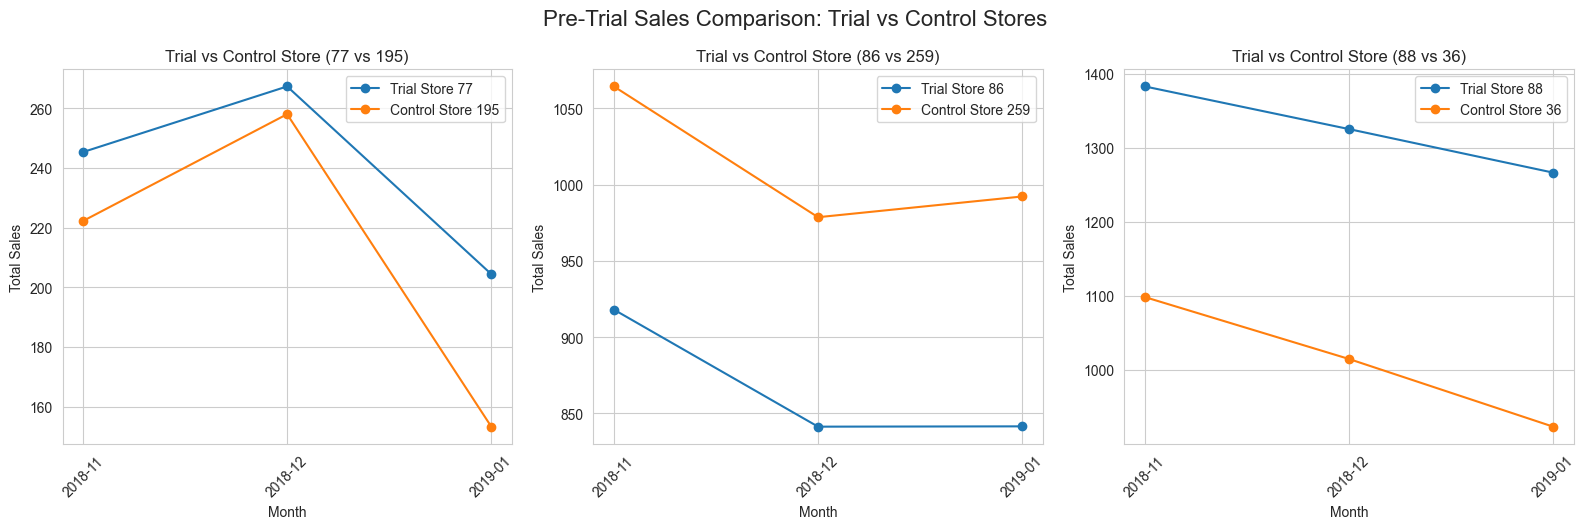

In [40]:
import matplotlib.pyplot as plt

# Create a mapping of trial stores to their control stores
trial_control_map = {77: 195, 86: 259, 88: 36}

# Plotting
plt.figure(figsize=(16, 5))

for i, (trial, control) in enumerate(trial_control_map.items(), start=1):
    plt.subplot(1, 3, i)
    
    # Extract monthly sales
    trial_sales = pivot_sales[trial]
    control_sales = pivot_sales[control]
    
    # Plot
    plt.plot(trial_sales.index.astype(str), trial_sales.values, label=f'Trial Store {trial}', marker='o')
    plt.plot(control_sales.index.astype(str), control_sales.values, label=f'Control Store {control}', marker='o')
    
    # Aesthetics
    plt.title(f"Trial vs Control Store ({trial} vs {control})")
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Pre-Trial Sales Comparison: Trial vs Control Stores", fontsize=16, y=1.05)
plt.show()


C:\Users\welcome\AppData\Local\Temp\ipykernel_6252\2057306245.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Retail Reimagined\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


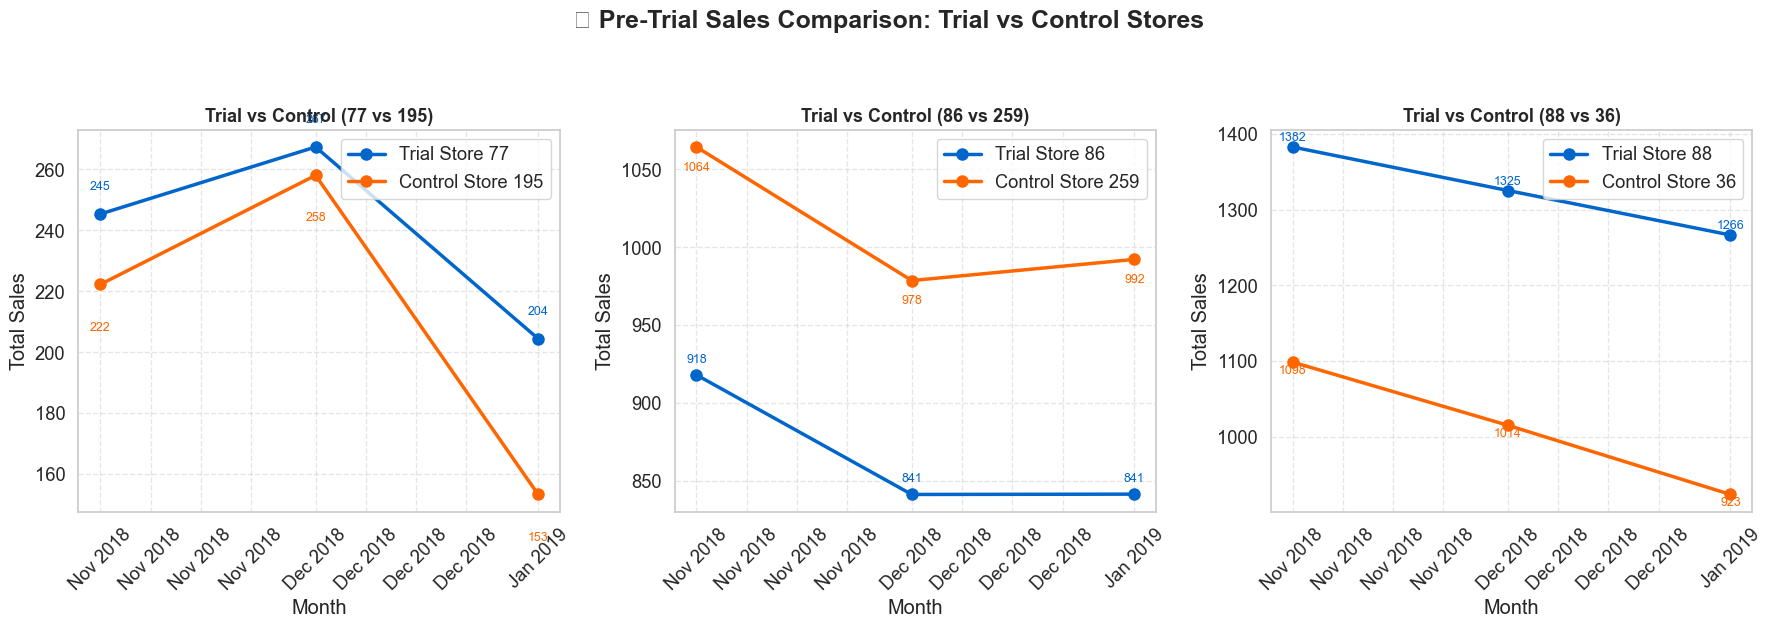

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

# Set modern aesthetic style
sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2)
custom_colors = ["#0066CC", "#FF6600"]  # Blue for trial, orange for control

plt.figure(figsize=(18, 6))

for i, (trial, control) in enumerate(trial_control_map.items(), start=1):
    ax = plt.subplot(1, 3, i)

    # Ensure proper format
    trial_sales = pivot_sales[trial].astype(float)
    control_sales = pivot_sales[control].astype(float)
    x_dates = pd.to_datetime(trial_sales.index.astype(str))

    # Plot lines
    ax.plot(x_dates, trial_sales.values, label=f'Trial Store {trial}',
            color=custom_colors[0], linewidth=2.5, marker='o', markersize=8)
    ax.plot(x_dates, control_sales.values, label=f'Control Store {control}',
            color=custom_colors[1], linewidth=2.5, marker='o', markersize=8)

    # Format dates and grid
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_title(f"Trial vs Control ({trial} vs {control})", fontsize=13, weight='bold')
    ax.set_xlabel("Month")
    ax.set_ylabel("Total Sales")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='x', rotation=45)

    # Annotate values
    for x, y in zip(x_dates, trial_sales):
        ax.text(x, y + 8, f'{int(y)}', ha='center', fontsize=9, color=custom_colors[0])
    for x, y in zip(x_dates, control_sales):
        ax.text(x, y - 15, f'{int(y)}', ha='center', fontsize=9, color=custom_colors[1])

    ax.legend(frameon=True, loc='upper right')

# Super title
plt.suptitle("📊 Pre-Trial Sales Comparison: Trial vs Control Stores", fontsize=18, weight='bold', y=1.05)

# Spacing
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
